In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle
!pip install -q kaggle
!kaggle competitions download -c nlp-getting-started

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 37.5MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 62.0MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 54.3MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_x, train_y = train.drop(['target', 'id'], axis=1), train['target']
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
train_x.shape

(6090, 3)

#SpaCy Model

In [ ]:
import spacy

nlp = spacy.blank('en')

textcat = nlp.create_pipe(
    "textcat",
    config={
        "exclusive_classes": True,
        "architecture": "bow"
    }
)

nlp.add_pipe(textcat)

In [ ]:
textcat.add_label("0")
textcat.add_label("1")

1

In [ ]:
train_text = train_x['text']
train_labels = [{"cats": {"0": label==0, "1": label==1}} for label in train_y]

In [ ]:
train_data = list(zip(train_text, train_labels))

In [ ]:
from spacy.util import minibatch
import random

random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()


losses = {}
for epoch in range(10):
  random.shuffle(train_data)

  batches = minibatch(train_data, size=8)

  for batch in batches:

    text, labels = zip(*batch)

    nlp.update(text, labels, sgd=optimizer, losses=losses, drop=0.5)

  print(losses)


{'textcat': 4.877706938772462}
{'textcat': 8.536761169089004}
{'textcat': 11.535694549966138}
{'textcat': 14.125234239952988}
{'textcat': 16.45645026756756}
{'textcat': 18.662062279699967}
{'textcat': 21.016545663807847}
{'textcat': 22.835085557995626}
{'textcat': 24.476685252416246}
{'textcat': 26.088289884668484}


In [ ]:
texts = val_x['text']

docs = [nlp.tokenizer(token) for token in texts]

textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

predicted_labels = scores.argmax(axis=1)
print([textcat.labels[label] for label in predicted_labels])

['0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
def get_score(val_data, predictions):
  total = 0
  for val, predict in zip(val_data,predictions):
    if val == predict:
      total += 1
    
  return total / len(predictions) * 100

In [ ]:
get_score(val_y, predicted_labels)

79.31713722915299

In [ ]:
texts = test['text']

docs = [nlp.tokenizer(token) for token in texts]

textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

predicted_labels = scores.argmax(axis=1)
print([textcat.labels[label] for label in predicted_labels])

['1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1',

In [ ]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [ ]:
output = pd.DataFrame({'Id': test.id,
                       'target': predicted_labels})
output.to_csv('submission.csv', index=False)

#Keras model

##Preprocessing data

In [ ]:
from keras.preprocessing.text import Tokenizer

x_train = train_x['text']
x_val = val_x['text']
test_text = test['text']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(x_train)

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_val = tokenizer.texts_to_sequences(x_val)
sequences_test = tokenizer.texts_to_sequences(test_text)

one_hot_results_train = tokenizer.texts_to_matrix(x_train, mode='binary')
one_hot_results_val = tokenizer.texts_to_matrix(x_val, mode='binary')
one_hot_results_test = tokenizer.texts_to_matrix(test_text, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 19517 unique tokens.


##Create and fit model

In [ ]:
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import Sequential

model = Sequential()
model.add(Embedding(1000, 8, input_length=1000))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 8)           8000      
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                256032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 264,065
Trainable params: 264,065
Non-trainable params: 0
__________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbakcs = [EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=15),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience = 10)]

In [ ]:
histoty = model.fit(
    one_hot_results_train,
    train_y,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=callbakcs,
    validation_data=(one_hot_results_val, val_y))

Epoch 1/100
153/153 [==============================] - 3s 12ms/step - loss: 0.6813 - acc: 0.5712 - val_loss: 0.6661 - val_acc: 0.5673
Epoch 2/100
153/153 [==============================] - 2s 11ms/step - loss: 0.6496 - acc: 0.6268 - val_loss: 0.6267 - val_acc: 0.6552
Epoch 3/100
153/153 [==============================] - 2s 11ms/step - loss: 0.6028 - acc: 0.6894 - val_loss: 0.5738 - val_acc: 0.7085
Epoch 4/100
153/153 [==============================] - 2s 11ms/step - loss: 0.5495 - acc: 0.7416 - val_loss: 0.5492 - val_acc: 0.7143
Epoch 5/100
153/153 [==============================] - 2s 11ms/step - loss: 0.4971 - acc: 0.7761 - val_loss: 0.5142 - val_acc: 0.7611
Epoch 6/100
153/153 [==============================] - 2s 10ms/step - loss: 0.4438 - acc: 0.8019 - val_loss: 0.4764 - val_acc: 0.7800
Epoch 7/100
153/153 [==============================] - 2s 11ms/step - loss: 0.4221 - acc: 0.8177 - val_loss: 0.4850 - val_acc: 0.7759
Epoch 8/100
153/153 [==============================] - 2s 11ms

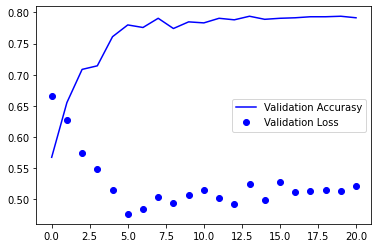

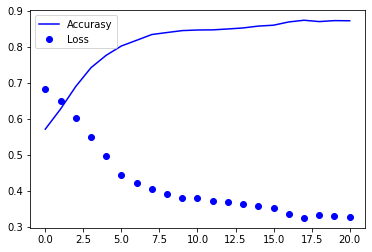

In [ ]:
import matplotlib.pyplot as plt

x = range(len(histoty.history['val_acc']))

plt.plot(x, histoty.history['val_acc'], 'b',label="Validation Accurasy")
plt.plot(x, histoty.history['val_loss'], 'bo',label="Validation Loss")
plt.legend()

plt.figure()
plt.plot(x, histoty.history['acc'], 'b',label="Accurasy")
plt.plot(x, histoty.history['loss'], 'bo',label="Loss")
plt.legend()


plt.show()

In [ ]:
output = pd.DataFrame({'Id': test.id,
                       'target': prediction})
output.to_csv('submission.csv', index=False)